In [1]:
prompt_to_generate_image = """Yor are an expert in generating matching girl/boy image based on the given palm features, gender and age. 

Instructions:
1. You will receive the extracted user palm features, gender of the person and age of the person.
2. The palm features Extracted from the software engineer working in Soliton technologies from south India.
3. If the gender of the person is male, generate female image.
4. If the gender of the person is female, generate male image.
5. If the age of the male person is 24, generate the female image, who like 24.
6. If the age of the female person is 24, generate the male image, who like 24.
7. Generate the image based on the palm features extracted.
8. The image generated should unique.
9. The image should be void of glamour and should be decent.
10. The generated image should not be offensive or hurt anyone's feelings.
11. All the Image should have text "You future partner look like" on the top of the image.
12. All the Image should have text "Matching image generated by palmistry AI" on the bottom of the image.
13. Generate the only girl/boy image is enough, no need mark the palm features on the image, dont include any other text.

Inputs: 
extracted palm features:
 1. Life Line                                                                                                       
    • i. Short lifeline on palm                                                                                    
 2. Head Line                                                                                                       
    • i. Curved                                                                                                    
    • ii. Medium                                                                                                   
 3. Heart Line                                                                                                      
    • i. Short                                                                                                     
    • ii. Straight                                                                                                 
 4. Line of Marriage                                                                                                
    • i. Short Marriage Line                                                                                       
    • ii. Curved upwards                                                                                           
    • iii. No Marriage Line                                                                                        
 5. Child Line                                                                                                      
    • i. Narrow & Shallow Children Line

gender: male

age: 20
"""

In [2]:
# imports
from openai import OpenAI  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images

# initialize OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY", "<your OpenAI API key if not set as env var>"))

In [3]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")

image_dir='.\\images'


In [4]:
# create an image

# set the prompt
prompt = "Create one cute girl photo"

# call the OpenAI API
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt_to_generate_image,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)

ImagesResponse(created=1736137890, data=[Image(b64_json=None, revised_prompt="Generate an image of a 20-year-old South Asian woman who is a software engineer and has a reflected set of palm features from a male counterpart. These features include a short life line, curved and medium head line, short and straight heart line, short marriage line curved upwards with no additional marriage line, and narrow & shallow children line. The image should have the text 'Your future partner looks like' at the top and 'Matching image generated by palmistry AI' at the bottom. Additionally, the image should be unique, decent, and non-offensive.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-ZW3ESWzQehGLlXljDDmSKf4m/user-YF4wF5WYfij0nlGkgpvxT8Vt/img-4Jlx4Apb5lC9YLWkGs1VygZm.png?st=2025-01-06T03%3A31%3A30Z&se=2025-01-06T05%3A31%3A30Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-01-0

In [5]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

.\images\generated_image.png


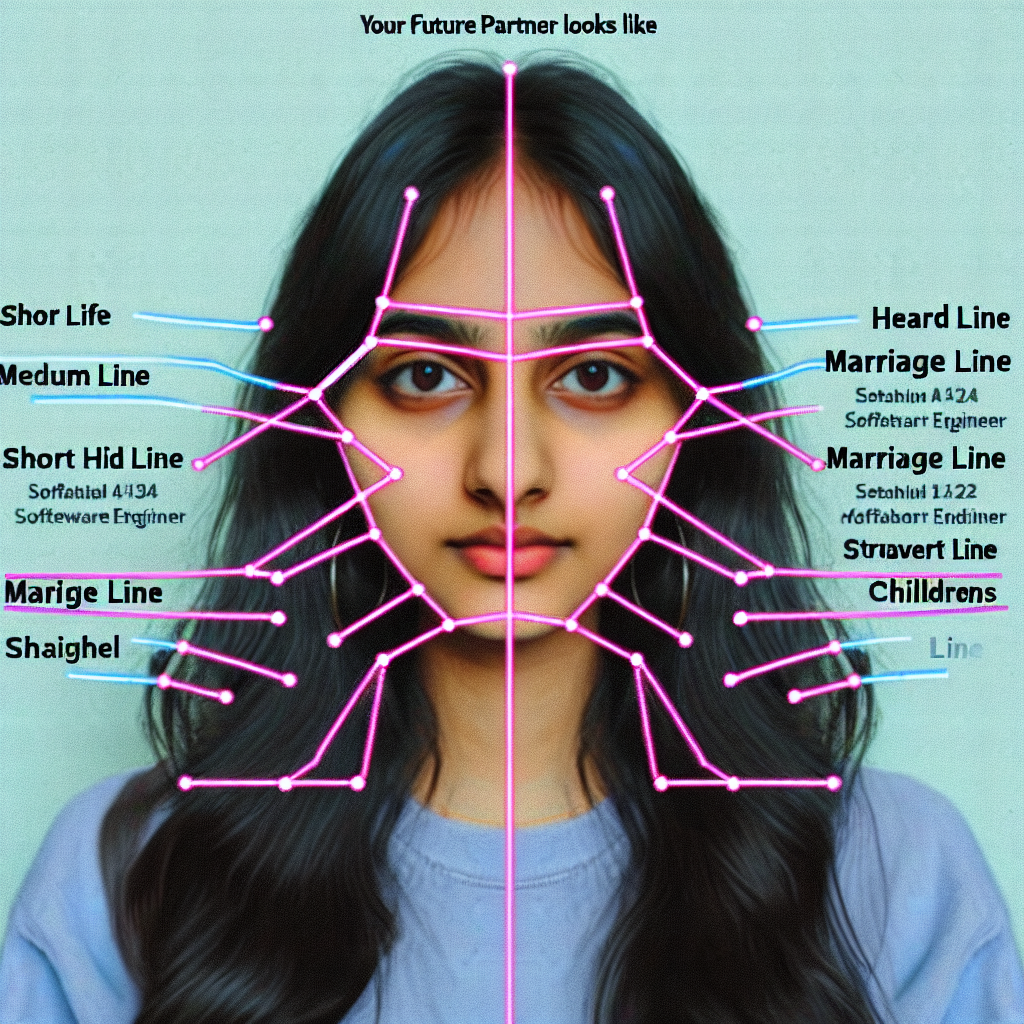

In [6]:
print(generated_image_filepath)
display(Image.open(generated_image_filepath))